# Importing Python Libraries

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import seaborn as sns
%matplotlib inline

## Loading the data

In [106]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [107]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [108]:
df.shape

(1338, 7)

In [109]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [110]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000


In [111]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [112]:
df=df.drop_duplicates()
df.shape

(1337, 7)

### Data Analysis

/tmp/ipykernel_38381/368622402.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x],ax=axes[0],kde=False)
/tmp/ipykernel_38381/368622402.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x],ax=axes[0],kde=False)
/tmp/ipykernel_38381/368622402.py:4: UserWarning: 

`distplot` is a deprec

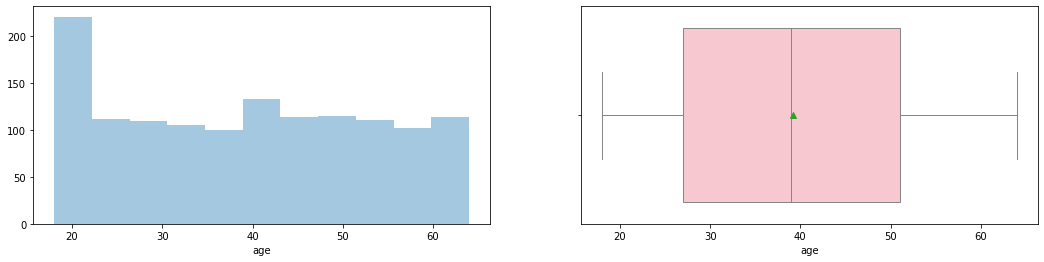

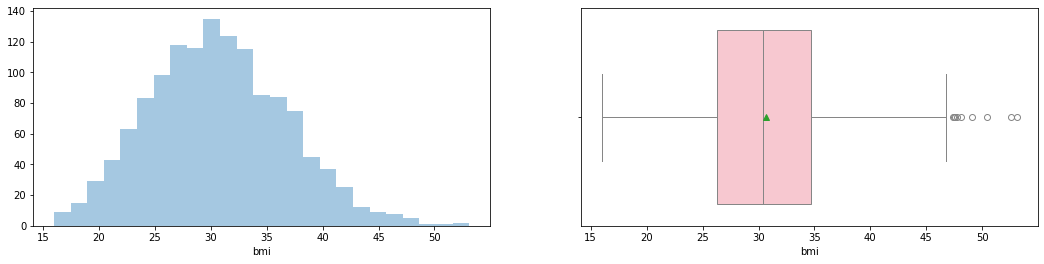

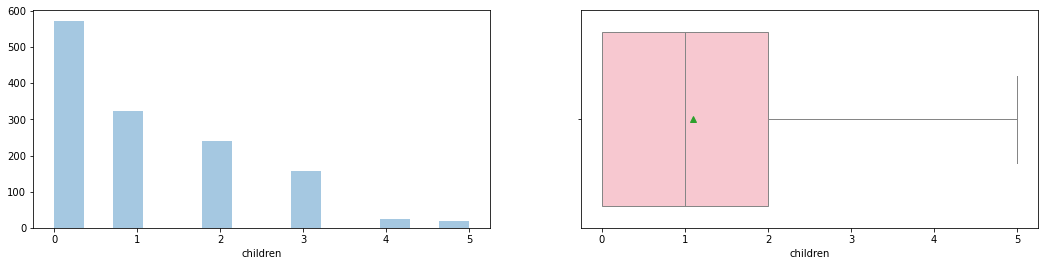

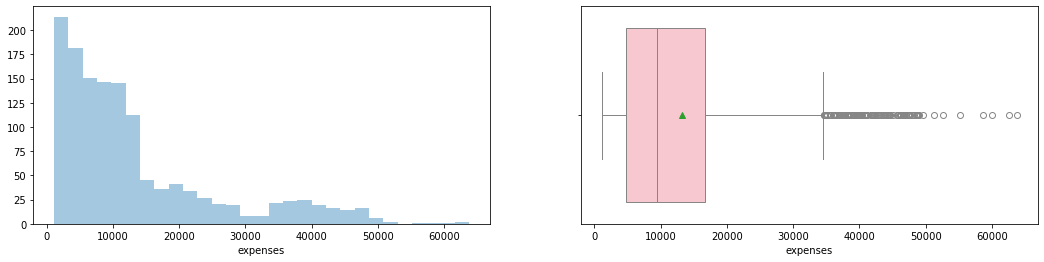

In [113]:
x_axis=['age','bmi','children','expenses']
for x in x_axis:
    fig,axes=plt.subplots(1,2,figsize=(18,4))
    sns.distplot(df[x],ax=axes[0],kde=False)
    sns.boxplot(df[x],ax=axes[1],orient='h',showmeans=True,color='pink')


#### Handling categorical data

In [114]:
df.sex.value_counts()
df.smoker.value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [115]:
df['sex']=df.sex.map({'female':0,'male':1})

In [116]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86


In [117]:
df['smoker']=df.smoker.map({'yes':1,'no':0})

In [118]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [119]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [120]:
df['region']=df.region.map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})

In [121]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,0,16884.92
1,18,1,33.8,1,0,1,1725.55
2,28,1,33.0,3,0,1,4449.46
3,33,1,22.7,0,0,2,21984.47
4,32,1,28.9,0,0,2,3866.86


#### Split the dataset in X and Y

In [122]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [123]:
x=df.drop(['expenses'],axis=1)


In [124]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,0
1,18,1,33.8,1,0,1
2,28,1,33.0,3,0,1
3,33,1,22.7,0,0,2
4,32,1,28.9,0,0,2


In [125]:
y=df['expenses']

In [126]:
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

## Train Test split

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [129]:
x_train.shape

(1069, 6)

In [130]:
x_test.shape

(268, 6)

In [131]:
from sklearn.linear_model import LinearRegression

In [132]:
LinearRegression=LinearRegression()

In [133]:
LinearRegression.fit(x_train,y_train)

LinearRegression()

In [134]:
y_pred=LinearRegression.predict(x_test)

In [135]:
from sklearn.metrics import r2_score
score1=r2_score(y_test,y_pred)

In [136]:
score1

0.8068280291899952

### Support Vector Regresser

In [137]:
from sklearn.svm import SVR

In [138]:
svm=SVR(kernel='linear')

In [139]:
svm.fit(x_train,y_train)

SVR(kernel='linear')

In [140]:
y_pred=svm.predict(x_test)
from sklearn.metrics import r2_score
score1=r2_score(y_test,y_pred)

In [141]:
score1

-0.14287855375503433

#### Random Forest regressor

In [142]:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor=RandomForestRegressor()

In [143]:
RandomForestRegressor.fit(x_train,y_train)

RandomForestRegressor()

In [146]:
y_pred=RandomForestRegressor.predict(x_test)
from sklearn.metrics import r2_score
score1=r2_score(y_test,y_pred)

In [147]:
score1

0.8828104249488893

So the correct model is RandomForest

In [148]:
RandomForestRegressor.fit(x_train,y_train)

RandomForestRegressor()

#### Predic the charges in new customer

In [153]:
data={
    'age':40,
    'sex':1,
    'bmi':39.9,
    'children':3,
    'smoker':1,
    'region':1

}
new_data=pd.DataFrame(data,index=[0])
new_data

,age,sex,bmi,children,smoker,region
0,40,1,39.9,3,1,1


In [154]:
pred=RandomForestRegressor.predict(new_data)

In [155]:
pred[0]

42311.402

## Save the Model

In [156]:
import joblib
joblib.dump(RandomForestRegressor,'randrom_forest_regressor')

['randrom_forest_regressor']